## Questions
1. Are more models using alternative sources of fuel? By how much?
2. How much have vehicle classes improved in fuel economy?
3. What are the characteristics of SmartWay vehicles?
4. What features are associated with better fuel economy?
5. For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fuel_08_df = pd.read_csv('all_alpha_08.csv')
fuel_18_df = pd.read_csv('all_alpha_18.csv')

### Assessing Data

In [84]:
# Q1 number of samples in each dataset
print("Number of samples in Y08 = {} and in Y18 = {}".format(fuel_08_df.shape[0], fuel_18_df.shape[0]))

Number of samples in Y08 = 2404 and in Y18 = 1611


In [85]:
# Q2 number of columns in each dataset
print("Number of columns in Y08 = {} and in Y18 = {}".format(fuel_08_df.columns.size, fuel_18_df.columns.size))

Number of columns in Y08 = 18 and in Y18 = 18


In [86]:
# Q3 duplicate rows in each dataset
print("Duplicate rows in Y08 = {} and in Y18 = {}".format(sum(fuel_08_df.duplicated()), sum(fuel_18_df.duplicated())))

Duplicate rows in Y08 = 25 and in Y18 = 0


In [87]:
# Q4 Datatypes of columns
fuel_08_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.2+ KB


In [88]:
fuel_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.7+ KB


In [89]:
# Q5 rows with missing data
fuel_08_df.isnull().any(axis=1).sum(), fuel_18_df.isnull().any(axis=1).sum()

(199, 2)

In [90]:
# Q6 Features with missing values fuel_08_df
fuel_08_df[fuel_08_df.isnull().any(axis=1)].count()

Model                   199
Displ                   199
Cyl                       0
Trans                     0
Drive                   106
Fuel                    199
Sales Area              199
Stnd                    199
Underhood ID            199
Veh Class               199
Air Pollution Score     199
FE Calc Appr              0
City MPG                  0
Hwy MPG                   0
Cmb MPG                   0
Unadj Cmb MPG             0
Greenhouse Gas Score      0
SmartWay                199
dtype: int64

## fuel_18_df
fuel_18_df[fuel_18_df.isnull().any(axis=1)].count()

In [91]:
# Q6 number of non-null unique values for features in each dataset
fuel_08_df.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [92]:
fuel_18_df.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [93]:
# unique SmartWay
fuel_08_df.SmartWay.nunique(), fuel_18_df.SmartWay.nunique()

(2, 3)

In [94]:
# unique Sales Area
fuel_08_df['Sales Area'].nunique()

3

### Cleaning Column Labels

In [95]:
# Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.
# Columns to Drop:
#From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
#From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'
fuel_08_df.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
fuel_18_df.drop(['Stnd', 'Underhood ID', 'Stnd Description', 'Comb CO2'], axis=1, inplace=True)

In [96]:
fuel_08_df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [97]:
fuel_18_df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [98]:
# Rename Columns fuel_08_df Sales Area -> Cert Region for consistency
fuel_08_df.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

In [99]:
fuel_08_df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [100]:
# Rename all column labels to replace spaces with underscores and convert everything to lowercase.
def replace_space_with_underscore(col):
    return col.replace(' ', '_').lower()

In [101]:
# fuel_08_df
fuel_08_cols = pd.Series(fuel_08_df.columns)
fuel_08_df.columns  = fuel_08_cols.apply(replace_space_with_underscore)
fuel_08_df.columns 

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [102]:
# fuel_18_df
fuel_18_cols = pd.Series(fuel_18_df.columns)
fuel_18_df.columns  = fuel_18_cols.apply(replace_space_with_underscore)
fuel_18_df.columns 

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [103]:
# confirm column labels for 2008 and 2018 datasets are identical
(fuel_08_df.columns == fuel_18_df.columns).all()

True

### Filter, Drop Nulls, Dedupe

In [104]:
# For consistency, only compare cars certified by California standards.
fuel_08_df = fuel_08_df.query("cert_region == 'CA'")
fuel_08_df.drop(['cert_region'], axis=1, inplace=True)
fuel_08_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [105]:
# for 2018
fuel_18_df = fuel_18_df.query("cert_region == 'CA'")
fuel_18_df.drop(['cert_region'], axis=1, inplace=True)
fuel_18_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [106]:
# Drop Nulls
fuel_08_df.isnull().any(axis=1).sum()
#ca_08.shape

75

In [107]:
fuel_18_df.isnull().any(axis=1).sum()

1

In [108]:
# drop rows with any null values in both datasets
fuel_08_df.dropna(how='any',inplace=True)
fuel_18_df.dropna(how='any',inplace=True)

In [109]:
fuel_08_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 2400
Data columns (total 13 columns):
model                   1009 non-null object
displ                   1009 non-null float64
cyl                     1009 non-null object
trans                   1009 non-null object
drive                   1009 non-null object
fuel                    1009 non-null object
veh_class               1009 non-null object
air_pollution_score     1009 non-null object
city_mpg                1009 non-null object
hwy_mpg                 1009 non-null object
cmb_mpg                 1009 non-null object
greenhouse_gas_score    1009 non-null object
smartway                1009 non-null object
dtypes: float64(1), object(12)
memory usage: 110.4+ KB


In [110]:
fuel_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 1609
Data columns (total 13 columns):
model                   797 non-null object
displ                   797 non-null float64
cyl                     797 non-null float64
trans                   797 non-null object
drive                   797 non-null object
fuel                    797 non-null object
veh_class               797 non-null object
air_pollution_score     797 non-null int64
city_mpg                797 non-null object
hwy_mpg                 797 non-null object
cmb_mpg                 797 non-null object
greenhouse_gas_score    797 non-null int64
smartway                797 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 87.2+ KB


## Dedupe Data

In [111]:
# print number of duplicates in 2008 and 2018 datasets
fuel_08_df.duplicated().sum(), fuel_18_df.duplicated().sum()

(23, 3)

In [112]:
fuel_08_df.drop_duplicates(inplace=True)
fuel_18_df.drop_duplicates(inplace=True)

In [113]:
# print number of duplicates again to confirm dedupe - should both be 0
fuel_08_df.duplicated().sum(), fuel_18_df.duplicated().sum()

(0, 0)

## Inspecting Data Types

In [114]:
# air pollution score
fuel_08_df.cyl.unique(), fuel_18_df.cyl.unique()

(array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
        '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object),
 array([ 6.,  4.,  5., 12., 16.,  8.,  3.]))

### Observation 'cyl' column: 
1. Extract int values from the strings in 2008 cyl column
2. Convert floats to ints in the 2018 cyl column

In [115]:
# Extract int from strings in the 2008 cyl column
fuel_08_df['cyl'] = fuel_08_df['cyl'].str.extract('(\d+)').astype(int)

In [116]:
# check cyl values
fuel_08_df.cyl.unique()

array([ 6,  4, 12,  8, 10, 16,  5,  2])

In [117]:
# convert 2018 cyl column to int
fuel_18_df['cyl'] = fuel_18_df['cyl'].astype(int)

In [118]:
# check cyl values
fuel_18_df.cyl.unique(), fuel_18_df.cyl.dtype

(array([ 6,  4,  5, 12, 16,  8,  3]), dtype('int64'))

In [119]:
# air pollution score
fuel_08_df.air_pollution_score.unique(), fuel_18_df.air_pollution_score.unique()

(array(['7', '6', '9.5', '9', '6/4'], dtype=object), array([3, 1, 7, 5, 6]))

### Observation 'air_pollution_score' column: 
1. Convert strings to floats in 2008 cyl column
2. Convert ints to floats in the 2018 cyl column

In [120]:
# green house gas score strings to ints
fuel_08_df.greenhouse_gas_score.unique(), fuel_18_df.greenhouse_gas_score.unique()

(array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10', '7/6'],
       dtype=object), array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8]))

### Fixing air_pollution_score

In [121]:
fuel_08_df[fuel_08_df['air_pollution_score'] == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [122]:
# First, let's get all the hybrids in 2008
hb_08 = fuel_08_df[fuel_08_df['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [123]:
# hybrids in 2018
hb_18 = fuel_18_df[fuel_18_df['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [124]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [125]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [126]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [127]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [128]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [129]:
# drop the original hybrid rows
fuel_08_df.drop(hb_08.index, inplace=True)

# add in our newly separated rows
fuel_08_df = fuel_08_df.append(new_rows, ignore_index=True)

In [130]:
# check that all the original hybrid rows with "/"s are gone
fuel_08_df[fuel_08_df['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [131]:
fuel_08_df.shape

(987, 13)

# Repeat this process for the 2018 dataset

In [132]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [133]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [134]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
fuel_18_df.drop(hb_18.index, inplace=True)

# append new_rows to df_18
fuel_18_df = fuel_18_df.append(new_rows)

In [135]:
# check that they're gone
fuel_18_df[fuel_18_df['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [136]:
fuel_18_df.shape

(832, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [137]:
# convert string to float for 2008 air pollution column
fuel_08_df['air_pollution_score'] = fuel_08_df['air_pollution_score'].astype(float)

In [138]:
# convert int to float for 2018 air pollution column
fuel_18_df['air_pollution_score'] = fuel_18_df['air_pollution_score'].astype(float)

In [139]:
# Match the new values for the dimensions of your new datasets
fuel_08_df.shape, fuel_18_df.shape

((987, 13), (832, 13))

### Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [140]:
fuel_08_df['greenhouse_gas_score'] = fuel_08_df['greenhouse_gas_score'].astype(int)

## Fix city_mpg, hwy_mpg and cmb_mpg to float

In [141]:
fuel_08_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
model                   987 non-null object
displ                   987 non-null float64
cyl                     987 non-null int64
trans                   987 non-null object
drive                   987 non-null object
fuel                    987 non-null object
veh_class               987 non-null object
air_pollution_score     987 non-null float64
city_mpg                987 non-null object
hwy_mpg                 987 non-null object
cmb_mpg                 987 non-null object
greenhouse_gas_score    987 non-null int64
smartway                987 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 100.4+ KB


In [142]:
fuel_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 1 to 1609
Data columns (total 13 columns):
model                   832 non-null object
displ                   832 non-null float64
cyl                     832 non-null int64
trans                   832 non-null object
drive                   832 non-null object
fuel                    832 non-null object
veh_class               832 non-null object
air_pollution_score     832 non-null float64
city_mpg                832 non-null object
hwy_mpg                 832 non-null object
cmb_mpg                 832 non-null object
greenhouse_gas_score    832 non-null int64
smartway                832 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 91.0+ KB


In [143]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    fuel_18_df[c] = fuel_18_df[c].astype(float)
    fuel_08_df[c] = fuel_08_df[c].astype(float)

## All the dataypes are now fixed! 

In [144]:
fuel_08_df.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [145]:
fuel_18_df.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [146]:
fuel_08_df.dtypes == fuel_18_df.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# Exploring Visuals

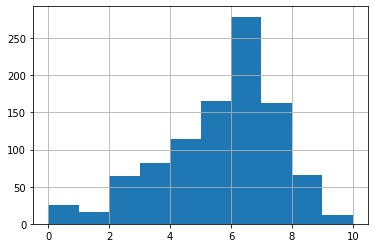

In [147]:
# Compare the distributions of greenhouse gas score in 2008 and 2018.
fuel_08_df.greenhouse_gas_score.hist();

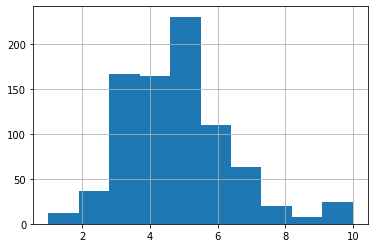

In [148]:
# 2018
fuel_18_df.greenhouse_gas_score.hist();

### Distribution for 2008 is more skewed to the left.

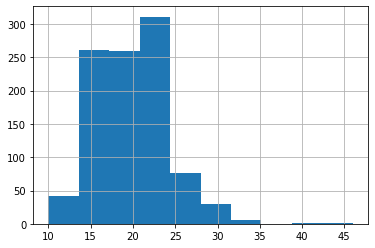

In [149]:
# How has the distribution of combined mpg changed from 2008 to 2018?
fuel_08_df.cmb_mpg.hist();

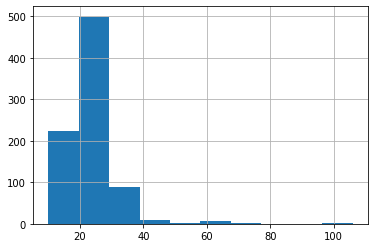

In [150]:
# cmb_mpg for 2018
fuel_18_df.cmb_mpg.hist();

### 2018 is much more skewed to the right

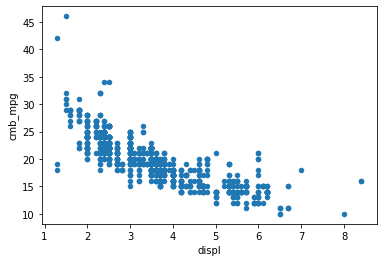

In [151]:
# Describe the correlation between displacement and combined mpg
fuel_08_df.plot(x='displ' , y = 'cmb_mpg', kind = 'scatter');

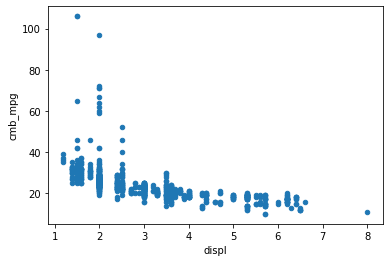

In [152]:
# 2018
fuel_18_df.plot(x='displ' , y = 'cmb_mpg', kind = 'scatter');

### Negative Correlation between displacement and combined mpg

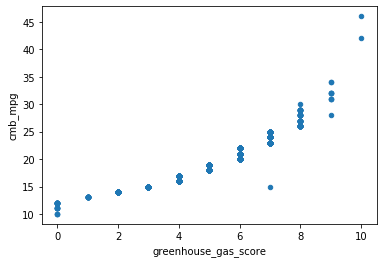

In [153]:
# Describe the correlation between displacement and combined mpg
fuel_08_df.plot(x='greenhouse_gas_score' , y = 'cmb_mpg', kind = 'scatter');

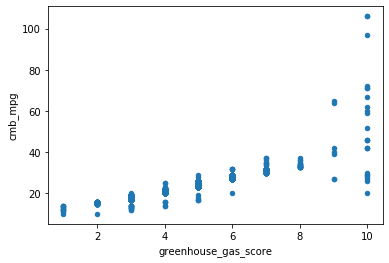

In [154]:
# Describe the correlation between displacement and combined mpg
fuel_18_df.plot(x='greenhouse_gas_score' , y = 'cmb_mpg', kind = 'scatter');

### Positive Correlation between displacement and combined mpg

## Drawing Conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [155]:
#2008
fuel_08_df.fuel.value_counts()

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

In [156]:
#2018
fuel_18_df.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [157]:
# alternative source used in 2008
alt_08 = fuel_08_df.query("fuel in ['ethanol', 'CNG']").model.nunique()

In [158]:
# 2018
alt_18 = fuel_18_df.query("fuel in ['Ethanol', 'Electricity']").model.nunique()

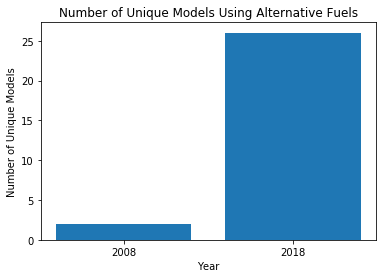

In [159]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [160]:
# proportion of vehicles using alternative sources of fuel
#total_08 = fuel_08_df.model.nunique()
fuel_08_df.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [162]:
# total unique models each year
total_08 = fuel_08_df.model.nunique()
total_18 = fuel_18_df.model.nunique()
total_08, total_18

(377, 357)

In [163]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

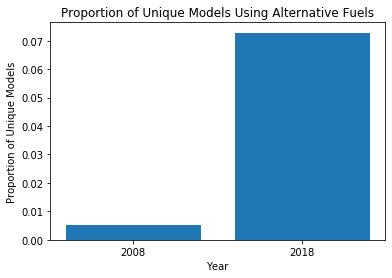

In [164]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [166]:
veh_08 = fuel_08_df.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [167]:
veh_18 = fuel_18_df.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [168]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

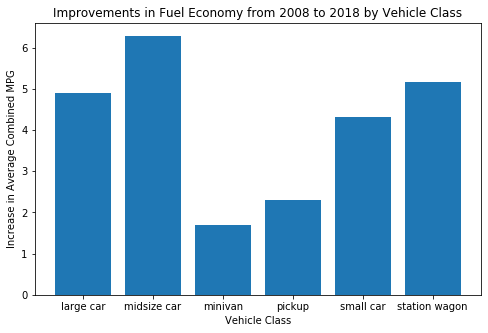

In [169]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [171]:
# smartway labels for 2008
fuel_08_df.smartway.unique()

array(['no', 'yes'], dtype=object)

In [173]:
# get all smartway vehicles in 2008
smart_08 = fuel_08_df.query('smartway == "yes"')

In [174]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [179]:
# smartway labels for 2018
fuel_18_df.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [182]:
# get all smartway vehicles in 2008
smart_18 = fuel_18_df.query('smartway in ["Yes", "Elite"]')

In [183]:
# explore smartway vehicles in 2008
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?
You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [184]:
top_08 = fuel_08_df.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [186]:
top_18 = fuel_18_df.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
